# Comparison of ML classifier methods

Here we compare different methods from the `sklearn` package for supervised learning. We will discuss the differences in detail, but first let us load the wine data used in our introduction:

In [1]:
import pandas as pd

dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

Once loaded, we must identify the information that we want to use as features and targets. "Quality", which is a non-continuous rating of the wine, is our target value and therefore is set as our y target. All other data is used in our fit. As quality is non-continuous, we will use "classifier" methods rather than "regression", which are for continuous features (e.g. acidity)

Once the `x` and `y` data is confirmed, we can split the data into training and test sets using the `train_test_split` functionality of `sklearn`:

In [2]:
y = data.quality
x = data.drop('quality', axis=1) # Removes quality from data, provides all other features

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

Finally before testing models, we need to standardise the data. We use a `StandardScaler()` to achieve this for the x-axis data:

In [3]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
# and now transform the data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Testing different models

In order for us to compare ML models, we are going to implement a function that takes in the models, fits, tests and reports the outcome of each model. This is just to make our life easier in doing all the evaluations in this notebook. 

Note: We *have not* used a pipeline here for optimising parameters, but this should be incorporated if pursuing any of these methods for your own work.

In [4]:
def test_models(models, x_train_scaled, x_test_scaled, y_train, y_test):
    for model in models:
        model.fit(x_train_scaled, y_train)
        pred = model.predict(x_test_scaled)
        accuracy = (y_test == pred.astype(int)).value_counts()
        print("Type: ", type(model))
        print("Accuracy: " + str(100*(accuracy[1]/(accuracy[0]+accuracy[1]))) + "%")

Our challenge now is that a full test of all classifiers would be quite exhaustive! All the options available are listed here: https://scikit-learn.org/stable/supervised_learning.html

To help chose a classifier for your own tasks, I recommend reviewing this flowchart that will point you in the correct general direction: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

One of the absolutely key points is to identify if your data is continuous, in which case you need a `regression` tool, or if it is discontinuous, in which case you need a `classifier`: https://scikit-learn.org/stable/tutorial/basic/tutorial.html. In our case, quality is not continuous - it is integer categorisations - and therefore we need to use classifiers.

### Regression

The most simple models are statistical fits, starting with textbook `LinearRegression()`. `LogisticRegression()` performs well as it is designed to handle binary decisions, and it is fast to train, but note these are still non-ideal regression approaches. The `Ridge()` approaches incorporate methods for estimating unknown parameters to improve a linear fit, so the fit has a better starting guess. One good benefit is it prevents overfitting as new parameters are introduced.

In [5]:
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.linear_model import Ridge, RidgeClassifier
LineR = LinearRegression()
LogR = LogisticRegression(max_iter=1000) #Increased from default of 100
RR = Ridge()
RC = RidgeClassifier()
test_models([LineR, LogR, RR, RC], x_train_scaled, x_test_scaled, y_train, y_test)

Type:  <class 'sklearn.linear_model._base.LinearRegression'>
Accuracy: 45.9375%
Type:  <class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy: 56.25%
Type:  <class 'sklearn.linear_model._ridge.Ridge'>
Accuracy: 45.9375%
Type:  <class 'sklearn.linear_model._ridge.RidgeClassifier'>
Accuracy: 55.3125%


### SVM

Support vector machines (SVM) are popular in text-classification problems where very-high dimensional/features are normal. These methods are good with noise but memory and compute intense (and can't do probability estimates, only classification)

In [6]:
from sklearn.svm import SVC
SVC = SVC()
test_models([SVC], x_train_scaled, x_test_scaled, y_train, y_test)

Type:  <class 'sklearn.svm._classes.SVC'>
Accuracy: 61.5625%


### SGD

Stochastic gradient descent (SGD) is an approach to fit linear classifiers, so really is a linear model approach. It is popular for large scale and sparse problems such as text-classification.

In [7]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()
test_models([SGDC], x_train_scaled, x_test_scaled, y_train, y_test)

Type:  <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
Accuracy: 55.625%


### K-nearest neighbors

This is an instance-based learning model, where classification is determined from a proximity to other neighbor points. Performs poorly on large-dimensional problems.

In [8]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
KNC = KNeighborsClassifier()
RNC = RadiusNeighborsClassifier(radius=5.0) #Increased from default of 1.0
test_models([KNC, RNC], x_train_scaled, x_test_scaled, y_train, y_test)

Type:  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Accuracy: 58.4375%
Type:  <class 'sklearn.neighbors._classification.RadiusNeighborsClassifier'>
Accuracy: 49.375%


### Gaussian processes

Predictions with Gaussians are probabilistic, so one can compute confidence values with this approach and decide if the value is accurately represented. These approaches require complete datasets and struggle with high dimensionality, say when the features > 20.

In [9]:
from sklearn.gaussian_process import GaussianProcessClassifier
GPC = GaussianProcessClassifier()
test_models([GPC], x_train_scaled, x_test_scaled, y_train, y_test)

Type:  <class 'sklearn.gaussian_process._gpc.GaussianProcessClassifier'>
Accuracy: 61.5625%


### Decision trees

Decision trees do not have parameters but instead work by forming a tree for decision making (as the name suggests!). This makes them simple to understand but can get overly complex!

In [10]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
test_models([DTC], x_train_scaled, x_test_scaled, y_train, y_test)

Type:  <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy: 60.9375%


One nice aspect of the decision tree is it is relatively easy to see the decision tree and understand it:

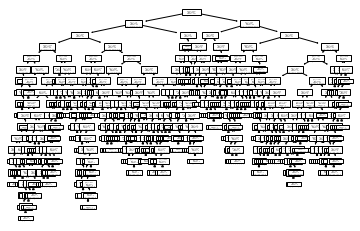

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
plot_tree(DTC)
plt.show()

### Ensemble approaches

As can be expected, ensemble approaches bring together several ML estimators (models) in order to improve generalisability. There are two main approaches:
- averaging methods (`BaggingClassifier()`, `RandomForestClassifier()`) that combine predictions for an average result, and
- boosting methods (`AdaBoostClassifier()`, `GradientBoostingClassifier()`) that sequentially couples the estimators in order to reduce bias.

In [12]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
BC = BaggingClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
test_models([BC, RFC, ABC, GBC], x_train_scaled, x_test_scaled, y_train, y_test)

Type:  <class 'sklearn.ensemble._bagging.BaggingClassifier'>
Accuracy: 65.9375%
Type:  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 70.3125%
Type:  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
Accuracy: 51.5625%
Type:  <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Accuracy: 62.5%


### Neural networks

Finally, for fun I have included the supervised neural networks approaches that are more regularly applied in deep-learning (unsupervised modelling). In short, these approaches learn a function of no predefined nature based on the training dataset. These approaches typically have many hyperparameters, as one can imagine given the model freedom!

In [13]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(max_iter=10000) #Increased from default of 200
test_models([MLPC], x_train_scaled, x_test_scaled, y_train, y_test)

Type:  <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
Accuracy: 62.5%
